In [1]:
import numpy as np

# Create monkey patches
np.float = float
np.int = int
np.object = object
np.bool = bool

In [2]:
from madmom.features.tempo import TempoEstimationProcessor
from madmom.features.beats import RNNBeatProcessor
from madmom.processors import SequentialProcessor

import librosa
import librosa.display
import pandas as pd
import utility_functions as utils
import importlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from ipywidgets import interact, widgets

importlib.reload(utils)

/Users/borosabel/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


<module 'utility_functions' from '/Users/borosabel/Documents/Uni/Thesis/PopMIR/Code/Audio/utility_functions.py'>

In [3]:
# Here I am just loading the saved progress because calculating everything would take like 2 days but above you can see the utility functions I used to calculate the features.
df = pd.read_excel('/Users/borosabel/Documents/Uni/Thesis/PopMIR/Data/Excel/baseline_data_w_topics_w_features.xlsx', engine='openpyxl')

In [4]:
df

,Artist,Album,Song,Coast,Release Year,Tempo1,Tempo2,Duration (s),Sample Rate (Hz),Path,...,Delta_MFCC_Mean_18,Delta_MFCC_Std_18,Delta2_MFCC_Mean_18,Delta2_MFCC_Std_18,Raw_MFCC_Mean_19,Raw_MFCC_Std_19,Delta_MFCC_Mean_19,Delta_MFCC_Std_19,Delta2_MFCC_Mean_19,Delta2_MFCC_Std_19
0,Big L,Lifestylez Ov Da Poor and Dangerous,8 Iz Enuff.mp3,east_coast,1995,96.774194,48.000000,298.840000,48000,/Users/borosabel/Documents/Uni/Thesis/PopMIR/D...,...,-0.000021,1.358306,-0.000043,0.915235,-3.153454,7.475548,0.000035,1.343144,0.000203,0.937476
1,Big L,Lifestylez Ov Da Poor and Dangerous,Da Graveyard.mp3,east_coast,1995,93.750000,46.511628,323.760000,48000,/Users/borosabel/Documents/Uni/Thesis/PopMIR/D...,...,0.000362,1.417600,-0.000426,1.016737,-0.245936,8.659272,0.000176,1.617870,-0.000542,1.091836
2,Big L,Lifestylez Ov Da Poor and Dangerous,I Don't Understand It.mp3,east_coast,1995,93.750000,47.244094,260.226667,48000,/Users/borosabel/Documents/Uni/Thesis/PopMIR/D...,...,0.000007,1.223709,0.000095,0.773686,-0.547386,7.437192,-0.000105,1.368790,0.000157,0.859366
3,Big L,Lifestylez Ov Da Poor and Dangerous,"No Endz, No Skinz.mp3",east_coast,1995,100.000000,50.420168,208.733333,48000,/Users/borosabel/Documents/Uni/Thesis/PopMIR/D...,...,-0.000214,1.164347,0.000087,0.769571,-1.566297,6.675558,-0.000312,1.268046,0.000172,0.856217
4,Big L,Lifestylez Ov Da Poor and Dangerous,MVP.mp3,east_coast,1995,86.956522,43.478261,218.866667,48000,/Users/borosabel/Documents/Uni/Thesis/PopMIR/D...,...,-0.000068,1.271479,-0.000235,0.895271,-2.257458,8.397979,-0.000024,1.502904,-0.000187,0.987014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1359,Dr.Dre,The Chronic,Dr. Dre - The Day the Niggaz Took Over (feat. ...,west_coast,1992,93.750000,46.875000,273.206000,48000,/Users/borosabel/Documents/Uni/Thesis/PopMIR/D...,...,0.000300,1.415803,0.000014,0.965833,3.105422,8.107130,0.000300,1.398945,-0.000331,0.943893
1360,Dr.Dre,The Chronic,"Dr. Dre - Bitches Ain't Shit (feat. Jewell, Sn...",west_coast,1992,92.307692,46.153846,287.207625,48000,/Users/borosabel/Documents/Uni/Thesis/PopMIR/D...,...,-0.000098,1.338693,-0.000104,0.923382,3.585479,8.419474,-0.000094,1.344639,-0.000100,0.945971
1361,Dr.Dre,The Chronic,Dr. Dre - Stranded On Death Row (feat. Bushwic...,west_coast,1992,90.909091,45.801527,287.335333,48000,/Users/borosabel/Documents/Uni/Thesis/PopMIR/D...,...,-0.000192,1.221769,-0.000096,0.872956,-1.408088,7.179779,-0.000186,1.220260,-0.000089,0.895696
1362,Dr.Dre,The Chronic,Dr. Dre - Nuthin' but a ＂G＂ Thang (feat. Snoop...,west_coast,1992,95.238095,47.244094,238.677917,48000,/Users/borosabel/Documents/Uni/Thesis/PopMIR/D...,...,0.000687,1.498789,0.000286,0.962360,3.666350,8.740702,-0.000545,1.380348,0.000392,0.903614


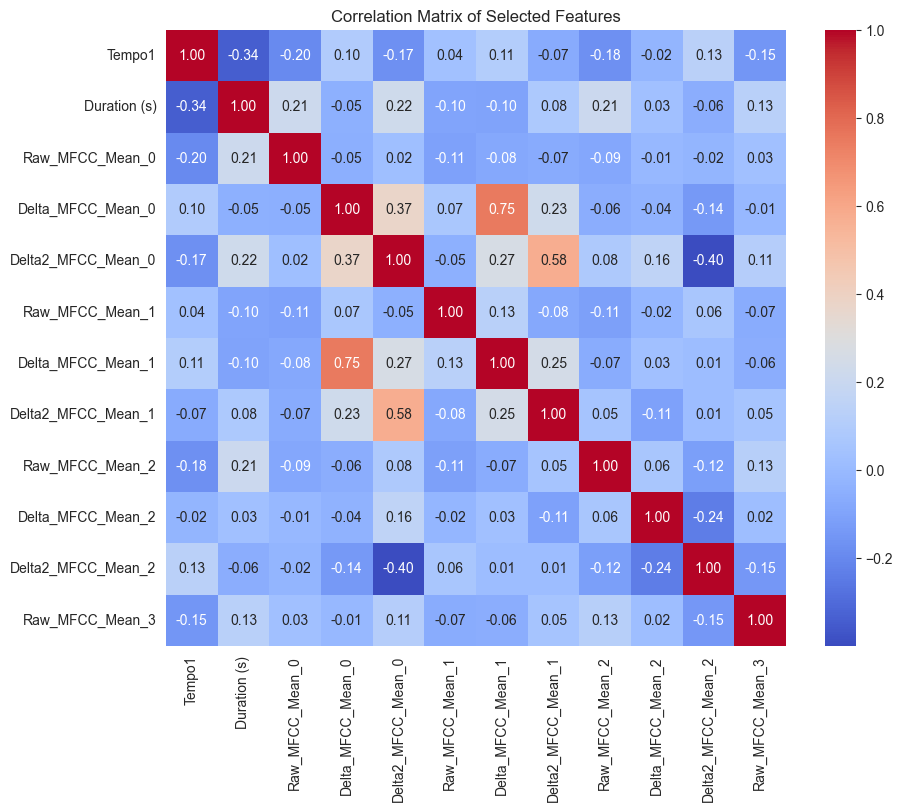

In [7]:
features = ['Tempo1', 'Duration (s)'] + [col for col in df.columns if 'MFCC_Mean' in col][:10]
correlation_matrix = df[features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Selected Features')
plt.show()

/var/folders/99/617f3z715_g8nc26tll89ddc0000gn/T/ipykernel_28493/4168600117.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Topic Model', y='Tempo1', data=mean_tempos, palette=colors)
/var/folders/99/617f3z715_g8nc26tll89ddc0000gn/T/ipykernel_28493/4168600117.py:13: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.barplot(x='Topic Model', y='Tempo1', data=mean_tempos, palette=colors)


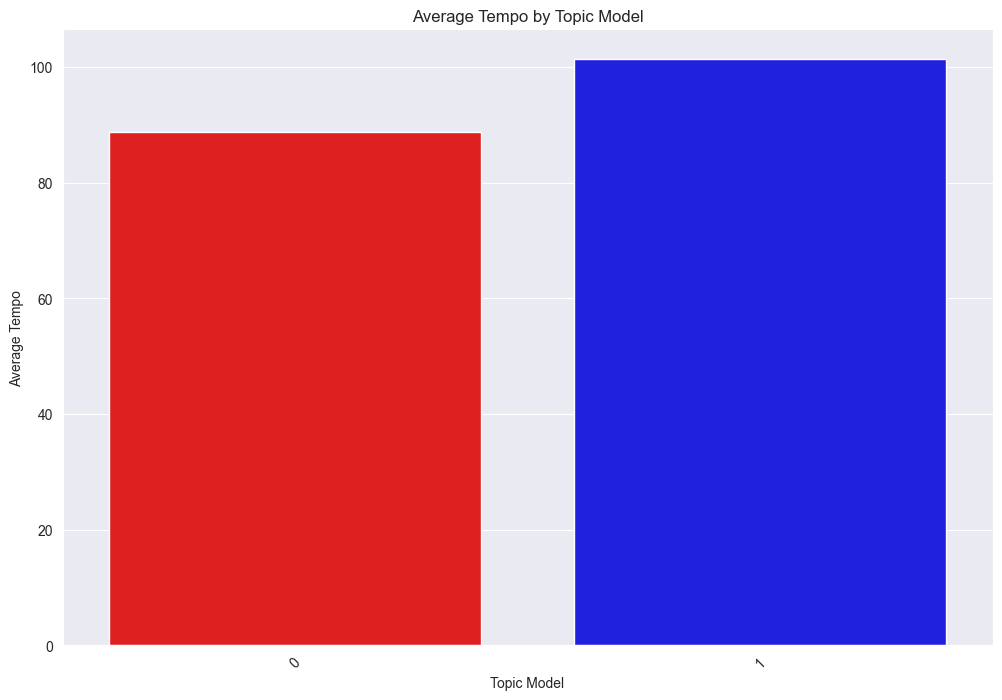

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assume 'df' is your DataFrame and it's already been loaded
# Calculate mean tempo for each topic
mean_tempos = df.groupby('Topic Model')['Tempo1'].mean().reset_index()

# Create a repeating color list
colors = ['red', 'blue'] * (len(mean_tempos) // 2 + 1)  # Ensures the list is long enough

plt.figure(figsize=(12, 8))
sns.barplot(x='Topic Model', y='Tempo1', data=mean_tempos, palette=colors)
plt.title('Average Tempo by Topic Model')
plt.xlabel('Topic Model')
plt.ylabel('Average Tempo')
plt.xticks(rotation=45)  # Rotate the labels for better readability
plt.show()

In [9]:
# Group by 'Release Year' and 'Topic Model', then calculate the mean tempo
tempo_per_topic_per_year = df.groupby(['Release Year', 'Topic Model'])['Tempo1'].mean().reset_index()

In [12]:
df

,Artist,Album,Song,Coast,Release Year,Tempo1,Tempo2,Duration (s),Sample Rate (Hz),Path,...,Delta_MFCC_Mean_18,Delta_MFCC_Std_18,Delta2_MFCC_Mean_18,Delta2_MFCC_Std_18,Raw_MFCC_Mean_19,Raw_MFCC_Std_19,Delta_MFCC_Mean_19,Delta_MFCC_Std_19,Delta2_MFCC_Mean_19,Delta2_MFCC_Std_19
0,Big L,Lifestylez Ov Da Poor and Dangerous,8 Iz Enuff.mp3,east_coast,1995,96.774194,48.000000,298.840000,48000,/Users/borosabel/Documents/Uni/Thesis/PopMIR/D...,...,-0.000021,1.358306,-0.000043,0.915235,-3.153454,7.475548,0.000035,1.343144,0.000203,0.937476
1,Big L,Lifestylez Ov Da Poor and Dangerous,Da Graveyard.mp3,east_coast,1995,93.750000,46.511628,323.760000,48000,/Users/borosabel/Documents/Uni/Thesis/PopMIR/D...,...,0.000362,1.417600,-0.000426,1.016737,-0.245936,8.659272,0.000176,1.617870,-0.000542,1.091836
2,Big L,Lifestylez Ov Da Poor and Dangerous,I Don't Understand It.mp3,east_coast,1995,93.750000,47.244094,260.226667,48000,/Users/borosabel/Documents/Uni/Thesis/PopMIR/D...,...,0.000007,1.223709,0.000095,0.773686,-0.547386,7.437192,-0.000105,1.368790,0.000157,0.859366
3,Big L,Lifestylez Ov Da Poor and Dangerous,"No Endz, No Skinz.mp3",east_coast,1995,100.000000,50.420168,208.733333,48000,/Users/borosabel/Documents/Uni/Thesis/PopMIR/D...,...,-0.000214,1.164347,0.000087,0.769571,-1.566297,6.675558,-0.000312,1.268046,0.000172,0.856217
4,Big L,Lifestylez Ov Da Poor and Dangerous,MVP.mp3,east_coast,1995,86.956522,43.478261,218.866667,48000,/Users/borosabel/Documents/Uni/Thesis/PopMIR/D...,...,-0.000068,1.271479,-0.000235,0.895271,-2.257458,8.397979,-0.000024,1.502904,-0.000187,0.987014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1359,Dr.Dre,The Chronic,Dr. Dre - The Day the Niggaz Took Over (feat. ...,west_coast,1992,93.750000,46.875000,273.206000,48000,/Users/borosabel/Documents/Uni/Thesis/PopMIR/D...,...,0.000300,1.415803,0.000014,0.965833,3.105422,8.107130,0.000300,1.398945,-0.000331,0.943893
1360,Dr.Dre,The Chronic,"Dr. Dre - Bitches Ain't Shit (feat. Jewell, Sn...",west_coast,1992,92.307692,46.153846,287.207625,48000,/Users/borosabel/Documents/Uni/Thesis/PopMIR/D...,...,-0.000098,1.338693,-0.000104,0.923382,3.585479,8.419474,-0.000094,1.344639,-0.000100,0.945971
1361,Dr.Dre,The Chronic,Dr. Dre - Stranded On Death Row (feat. Bushwic...,west_coast,1992,90.909091,45.801527,287.335333,48000,/Users/borosabel/Documents/Uni/Thesis/PopMIR/D...,...,-0.000192,1.221769,-0.000096,0.872956,-1.408088,7.179779,-0.000186,1.220260,-0.000089,0.895696
1362,Dr.Dre,The Chronic,Dr. Dre - Nuthin' but a ＂G＂ Thang (feat. Snoop...,west_coast,1992,95.238095,47.244094,238.677917,48000,/Users/borosabel/Documents/Uni/Thesis/PopMIR/D...,...,0.000687,1.498789,0.000286,0.962360,3.666350,8.740702,-0.000545,1.380348,0.000392,0.903614


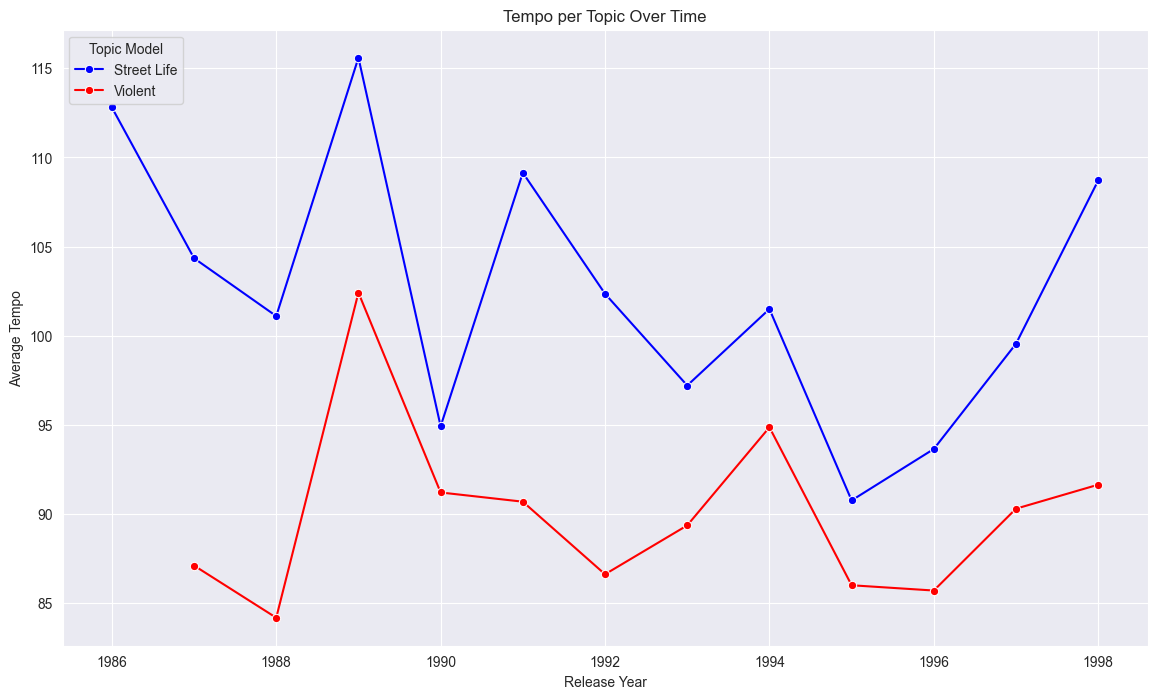

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

topic_label_mapping = {
    0: 'Violent',
    1: 'Street Life'
    # Add more mappings as needed
}

# Replace the 'Topic Model' column with the new labels
tempo_per_topic_per_year['Topic Model'] = tempo_per_topic_per_year['Topic Model'].replace(topic_label_mapping)

palette = {'Violent': 'red', 'Street Life': 'blue'}

# Plotting
plt.figure(figsize=(14, 8))
sns.lineplot(
    x='Release Year',
    y='Tempo1',
    hue='Topic Model',
    data=tempo_per_topic_per_year,
    marker='o',
    palette=palette  # Use the custom palette
)
plt.title('Tempo per Topic Over Time')
plt.xlabel('Release Year')
plt.ylabel('Average Tempo')
plt.legend(title='Topic Model', loc='upper left')
plt.grid(True)
plt.savefig('tempo_per_topic_model_over_time')
plt.show()

In [13]:
df['Topic Model']

0       0
1       0
2       1
3       1
4       1
       ..
1359    0
1360    0
1361    0
1362    0
1363    0
Name: Topic Model, Length: 1364, dtype: int64

In [14]:
# Group by 'Release Year' and 'Topic Model', then calculate the mean tempo
df_1 = df[df['Topic Model'] == 1]
tempo_per_topic_per_year_1 = df_1.groupby(['Release Year', 'Coast'])['Tempo1'].mean().reset_index()

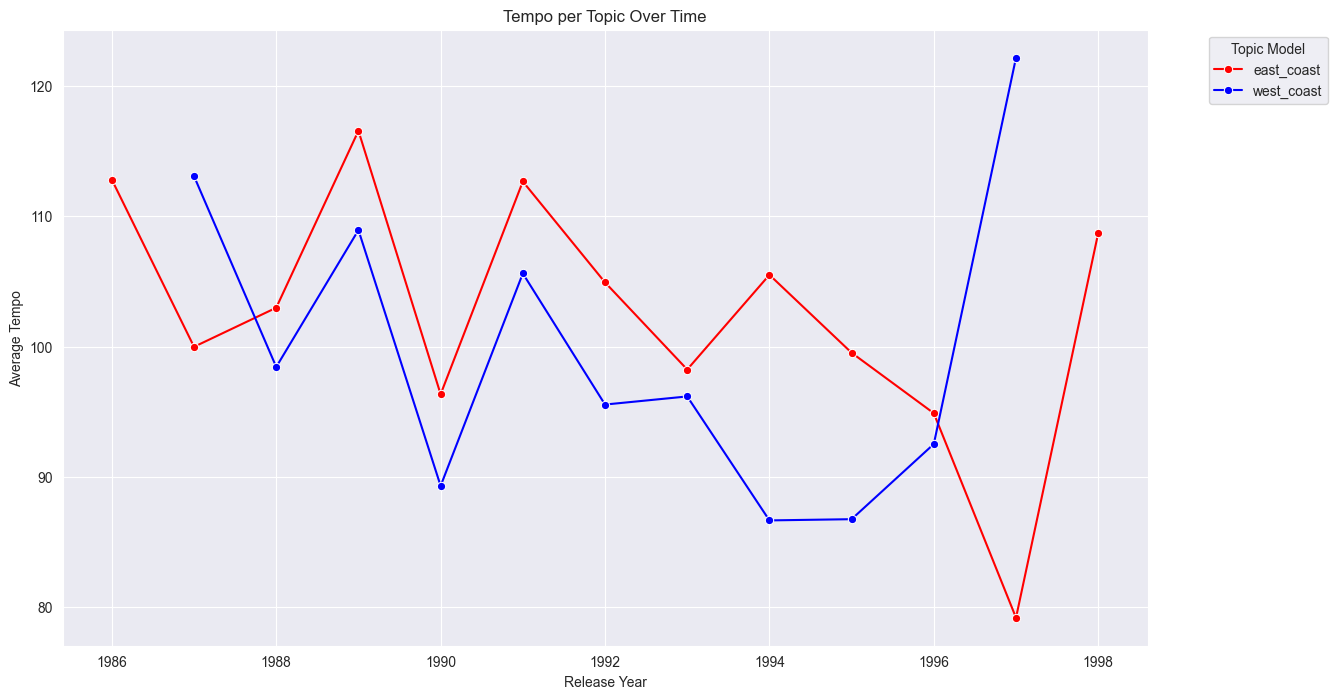

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

palette = {'east_coast': 'red', 'west_coast': 'blue'}  # Add more topics and colors as needed

plt.figure(figsize=(14, 8))
sns.lineplot(
    x='Release Year',
    y='Tempo1',
    hue='Coast',
    data=tempo_per_topic_per_year_1,
    marker='o',
    palette=palette  # Use the custom palette
)
plt.title('Tempo per Topic Over Time')
plt.xlabel('Release Year')
plt.ylabel('Average Tempo')
plt.legend(title='Topic Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [18]:
df.columns

Index(['Artist', 'Album', 'Song', 'Coast', 'Release Year', 'Tempo1', 'Tempo2',
       'Duration (s)', 'Sample Rate (Hz)', 'Path',
       ...
       'Delta_MFCC_Mean_18', 'Delta_MFCC_Std_18', 'Delta2_MFCC_Mean_18',
       'Delta2_MFCC_Std_18', 'Raw_MFCC_Mean_19', 'Raw_MFCC_Std_19',
       'Delta_MFCC_Mean_19', 'Delta_MFCC_Std_19', 'Delta2_MFCC_Mean_19',
       'Delta2_MFCC_Std_19'],
      dtype='object', length=390)

In [16]:
# Group by 'Release Year' and 'Topic Model', then calculate the mean tempo
df_0 = df[df['Topic Model'] == 0]
tempo_per_topic_per_year_0 = df_0.groupby(['Release Year', 'Coast'])['Tempo1'].mean().reset_index()

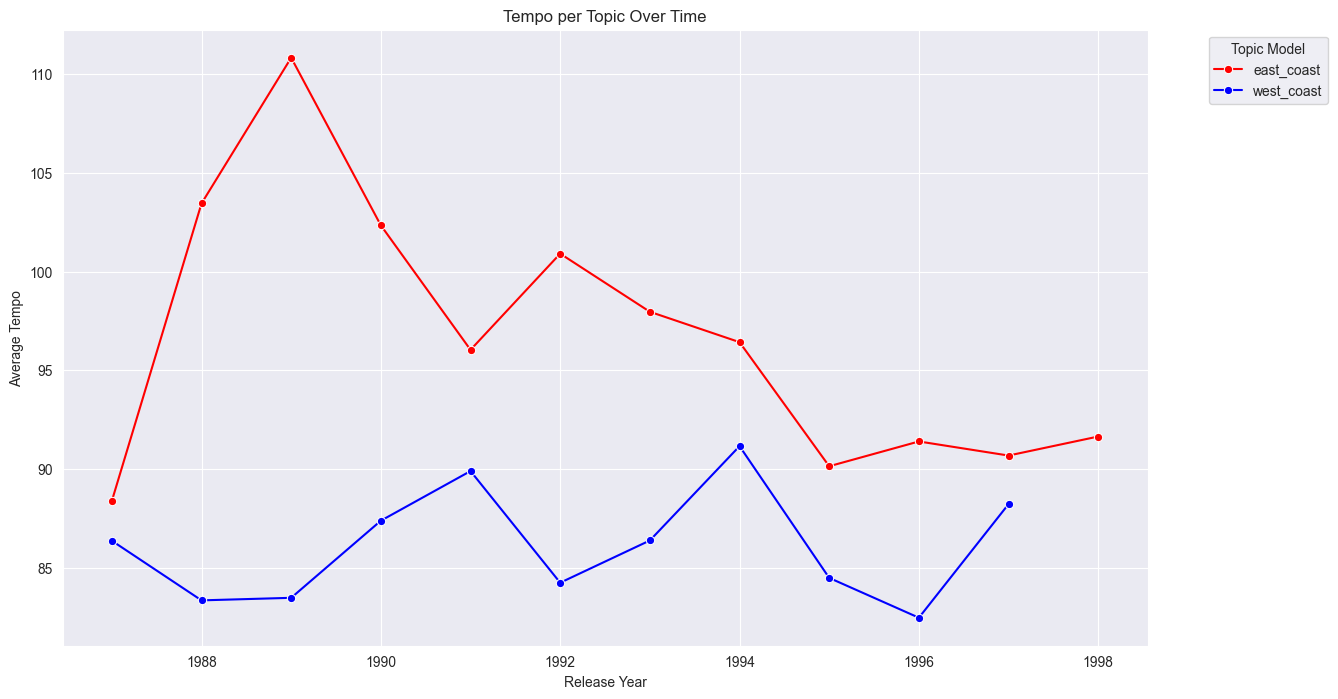

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

palette = {'east_coast': 'red', 'west_coast': 'blue'}  # Add more topics and colors as needed

plt.figure(figsize=(14, 8))
sns.lineplot(
    x='Release Year',
    y='Tempo1',
    hue='Coast',
    data=tempo_per_topic_per_year_0,
    marker='o',
    palette=palette  # Use the custom palette
)
plt.title('Tempo per Topic Over Time')
plt.xlabel('Release Year')
plt.ylabel('Average Tempo')
plt.legend(title='Topic Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [ ]:
topic_columns = [col for col in df.columns if col.startswith('Topic')]
audio_columns = ['Tempo1', 'ZCR Mean', 'Raw_MFCC_Mean_0', 'Raw_MFCC_Mean_1']  # extend this list based on your features

# Calculate correlation matrix
correlation_matrix = df[topic_columns + audio_columns].corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Topic Proportions and Audio Features')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
features_scaled = scaler.fit_transform(df[topic_columns + audio_columns])

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=0).fit(features_scaled)
df['Cluster'] = kmeans.labels_

# Visualize clusters in a reduced dimensional space
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features_scaled)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=reduced_features[:, 0], y=reduced_features[:, 1], hue=df['Cluster'], palette='viridis')
plt.title('Song Clusters based on Topics and Audio Features')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

# Example: Predicting Topic_1 weight from Tempo1 and MFCC
X = df[['Tempo1', 'Raw_MFCC_Mean_0']]
y = df['Topic Model']
model = LinearRegression()
model.fit(X, y)
print("Coefficients:", model.coef_)

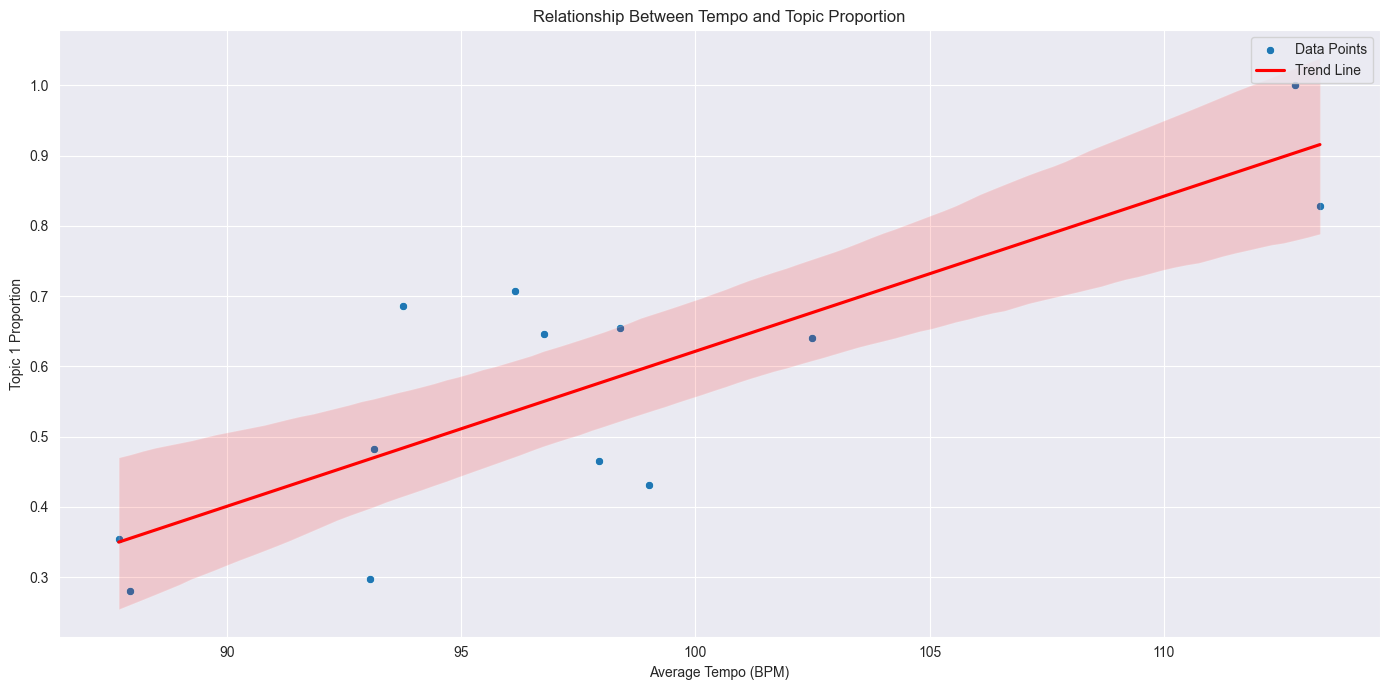

In [12]:
# Assuming 'df' is your DataFrame with relevant data
df['Release Year'] = pd.to_numeric(df['Release Year'])

# Define topic columns and audio columns
topic_columns = ['Topic Model']  # Replace with actual topic columns if there are multiple
audio_columns = ['Tempo1']       # Replace with actual audio feature columns

# Group by 'Release Year' and calculate the mean for each year
avg_features_by_year = df.groupby('Release Year')[topic_columns + audio_columns].mean().reset_index()

# Scatter plot with trend line
plt.figure(figsize=(14, 7))
sns.scatterplot(data=avg_features_by_year, x='Tempo1', y='Topic Model', label='Data Points')
sns.regplot(data=avg_features_by_year, x='Tempo1', y='Topic Model', scatter=False, color='r', label='Trend Line')

plt.title('Relationship Between Tempo and Topic Proportion')
plt.xlabel('Average Tempo (BPM)')
plt.ylabel('Topic 1 Proportion')
plt.legend()
plt.grid(True)
plt.tight_layout()
# plt.savefig('relationship_between_tempo_and_topic_proportion.png', dpi=300, bbox_inches='tight')
plt.show()

In [2]:
# Assuming 'df' is your DataFrame with relevant data

# Define the tempo value and tolerance
target_tempo = 95
tolerance = 1  # Adjust tolerance as needed

# Filter rows where tempo is close to the target tempo
filtered_df = df[(df['Tempo1'] >= target_tempo - tolerance) & (df['Tempo1'] <= target_tempo + tolerance)]

# Calculate the average topic proportion for the filtered rows
average_topic_proportion = filtered_df['Topic Model'].mean()

print(f"Average Topic Proportion for songs with tempo around {target_tempo} BPM: {average_topic_proportion}")

# Optional: Check the distribution of topic proportions
topic_proportion_distribution = filtered_df['Topic Model'].value_counts(normalize=True)
print(topic_proportion_distribution)

NameError: name 'df' is not defined